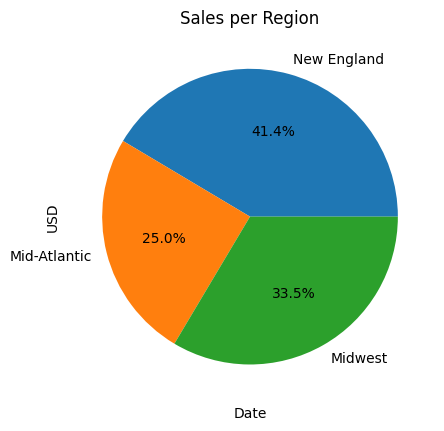

In [ ]:
from matplotlib import pyplot as plt

#GRAFICO A LINEA
days = ['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
prices = [729.77, 735.11, 755.98, 816.04, 880.02]

plt.plot(days, prices)
plt.title('NASDAQ: TSLA')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show


#GRAFICO A TORTA
regions = ['New England', 'Mid-Atlantic', 'Midwest']
sales = [882703, 532648, 714406]

plt.pie(sales, labels=regions, autopct='%1.1f%%') #autopct per visualizzare i valori percentuali nelle fette di torta, utilizzando la formattazione delle stringhe Python per mostrare i valori al decimo di percentuale più vicino.
plt.title('Sales per Region')
plt.show()

#GRAFICO A BARRE
plt.bar(regions, sales)
plt.xlabel('Regions')
plt.ylabel('Slaes')
plt.title('Annual Slaes aggregated on a Regional basis')
plt.show()


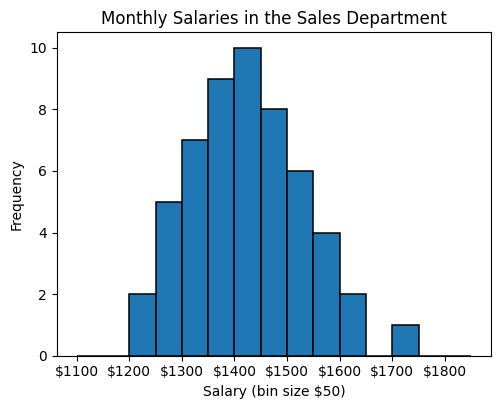

In [ ]:
#SUBPLOTS
# importare i moduli 
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib.ticker as ticker

# dati da visualizzare 
salaries = [1215, 1221, 1263, 1267, 1271, 1274, 1275, 1318, 1320, 1324, 1324, 1326, 1337, 1346, 1354, 1355, 1364, 1367, 1372, 1375, 
            1376, 1378, 1378, 1410, 1415, 1415, 1418, 1420, 1422, 1426, 1430, 1434, 1437, 1451, 1454, 1467, 1470, 1473, 1477, 1479,
            1480, 1514, 1516, 1522, 1529, 1544, 1547, 1554, 1562, 1584, 1595, 1616, 1626, 1717] 
# preparare l'istogramma 
fig, ax = plt.subplots() 
fig.set_size_inches (5.6, 4.2) 
ax.hist(salaries, bins=np.arange(1100, 1900, 50), edgecolor='black',  linewidth=1.1) 
formatter = ticker.FormatStrFormatter('$%1.0f') # mette il $ prima dei salari 
ax.xaxis.set_major_formatter(formatter)  # lo applica effettivamente alle etichette dei salari
plt.title('Monthly Salaries in the Sales Department') 
plt.xlabel('Salary (bin size $50)') 
plt.ylabel('Frequency') 
#mostrare l'istogramma 
plt.show()

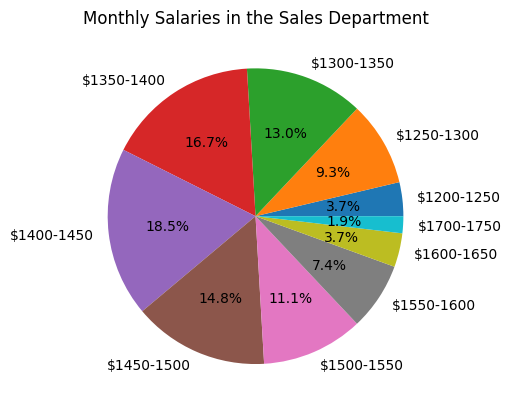

In [ ]:
#MOSTRARE LE DISTRIBUZIONI DI FREQUENZA SU UN GRAFICO A TORTA pg 10
import numpy as  np
from matplotlib import pyplot as plt
salaries = [1215, 1221, 1263, 1267, 1271, 1274, 1275, 1318, 1320, 1324, 1324, 1326, 1337, 1346, 1354, 1355, 1364, 1367,
            1372, 1375, 1376, 1378, 1378, 1410, 1415, 1415, 1418, 1420, 1422, 1426, 1430, 1434, 1437, 1451, 1454, 1467,
            1470, 1473, 1477, 1479,1480, 1514, 1516, 1522, 1529, 1544, 1547, 1554, 1562, 1584, 1595, 1616, 1626, 1717]

count, labels = np.histogram(salaries, bins=np.arange(1100, 1900, 50))

labels = ['$'+str(labels[i])+'-'+str(labels[i+1]) for i, _ in enumerate(labels[1:])]
non_zero_pos = [i for i, x in enumerate(count) if x != 0]

labels = [e for i, e in enumerate(labels) if i in non_zero_pos]
count = [e for i, e in enumerate(count) if i in non_zero_pos]
#print(labels)

plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

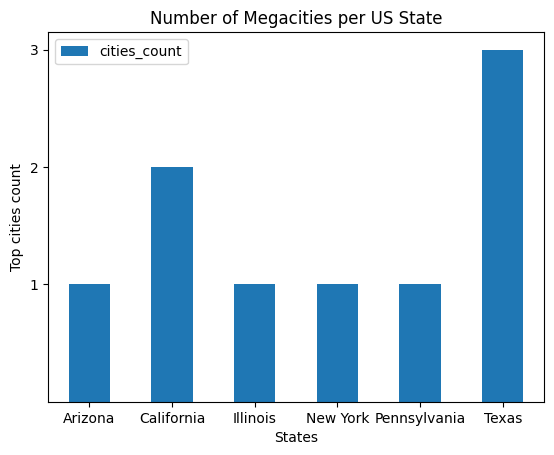

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
#preparare il DataFrame 
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv") 
top_us_cities = us_cities[us_cities.Population.ge(1000000)] 
top_cities_count = top_us_cities.groupby(['State'], as_index = False) .count().rename(columns={'City': 'cities_count'}) [['State', 'cities_count']] 
#disegnare il grafico 
top_cities_count.plot.bar('State', 'cities_count', rot=0) 
plt.xlabel("States") 
plt.ylabel("Top cities count") 
plt.title("Number of Megacities per US State") 
plt.yticks (range(min(top_cities_count['cities_count']), 
max(top_cities_count['cities_count'])+1)) 
plt.show()

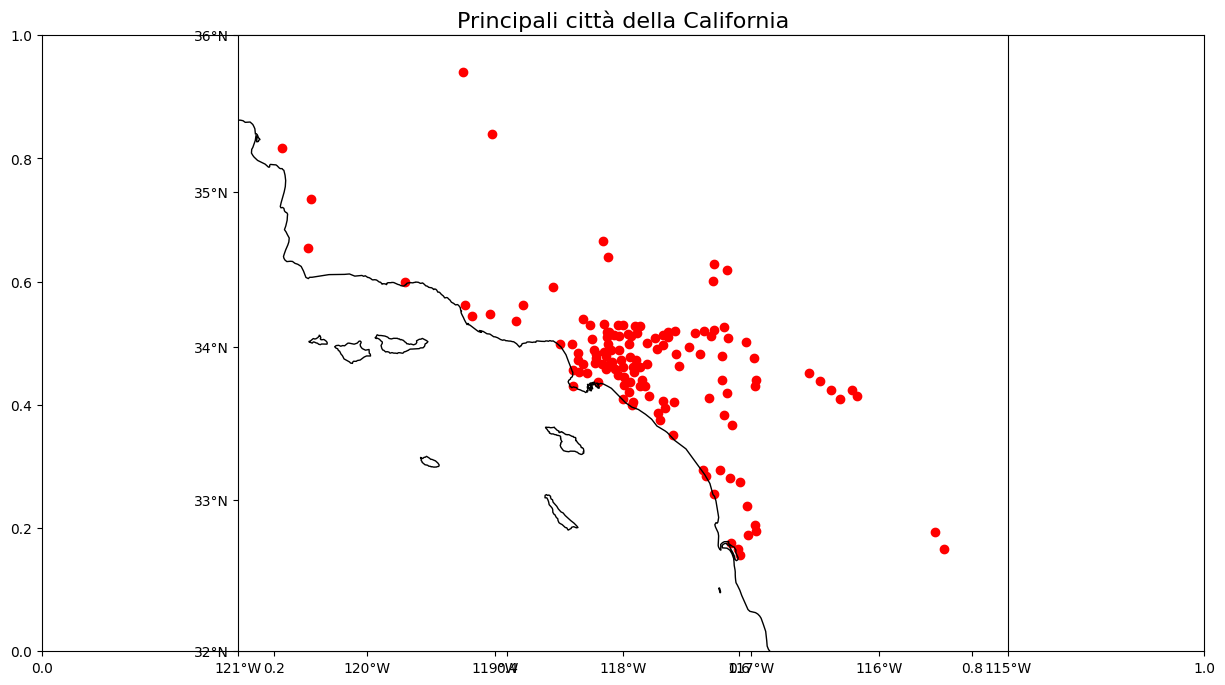

In [5]:
#CARTOPY
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Caricamento dati
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv") 
calif_cities = us_cities[us_cities.State.eq('California')]

#mappa
fig, ax = plt.subplots(figsize=(15,8)) 
ax = plt.axes(projection=ccrs.Mercator()) 
ax.coastlines('10m')

# Imposta tick con il CRS corretto
ax.set_yticks ([32,33,34,35,36], crs=ccrs.PlateCarree()) 
ax.set_xticks([-121, -120, -119, -118, -117, -116, -115], crs=ccrs.PlateCarree())

# Formattatori di coordinate
lon_formatter = LongitudeFormatter() 
lat_formatter = LatitudeFormatter() 
ax.xaxis.set_major_formatter(lon_formatter) 
ax.yaxis.set_major_formatter(lat_formatter)

# Estensione della mappa (California)
ax.set_extent([-121, -115, 32, 36])

# Scatter plot delle città
X = calif_cities['lon'] 
Y = calif_cities['lat']
ax.scatter(X, Y, color='red', marker='o', transform=ccrs. PlateCarree()) 

plt.title("Principali città della California", fontsize=16)
plt.show()

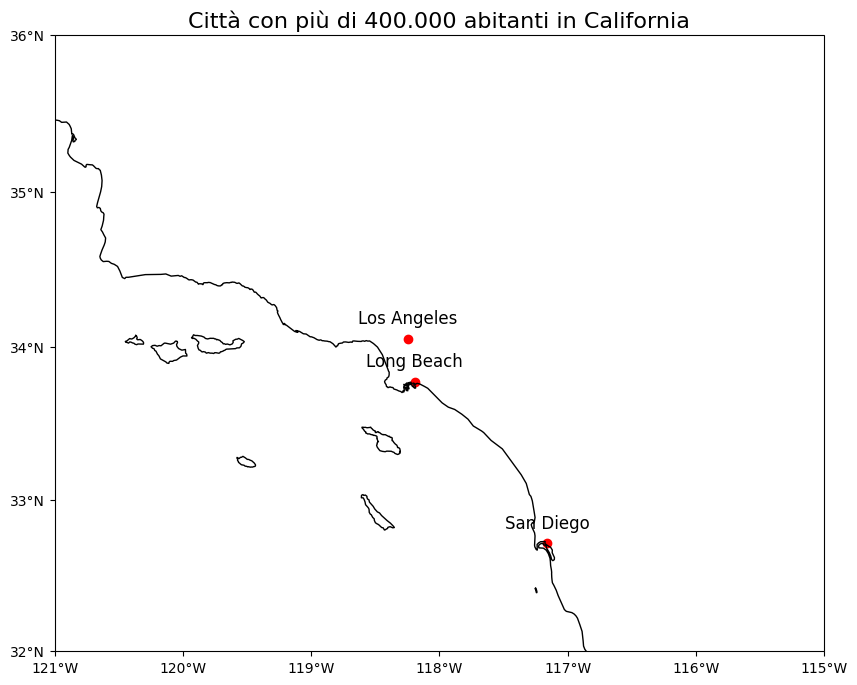

In [6]:
# Dati
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
calif_cities = us_cities[us_cities.State == 'California']
top_calif_cities = calif_cities[calif_cities['Population'] >= 400000]

# Mappa
fig = plt.figure(figsize=[15, 8])
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

# Coordinate e ticks
ax.set_yticks([32, 33, 34, 35, 36], crs=ccrs.PlateCarree())
ax.set_xticks([-121, -120, -119, -118, -117, -116, -115], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_extent([-121, -115, 32, 36])

# Dati città
X = top_calif_cities['lon']
Y = top_calif_cities['lat']
cities = top_calif_cities['City']

# Scatter e label
ax.scatter(X, Y, color='red', marker='o', transform=ccrs.PlateCarree())

for i in top_calif_cities.index:
    ax.text(X[i], Y[i] + 0.1, cities[i],
            transform=ccrs.Geodetic(), fontsize=12,
            horizontalalignment='center', clip_on=True)

plt.title("Città con più di 400.000 abitanti in California", fontsize=16)
plt.show()